In [2]:
import pandas as pd

In [3]:
def load_data(file_path):
    return pd.read_csv(file_path)

In [4]:
def clean_data(df):
    # Check for missing values
    print("\nMissing values in each column:")
    print(df.isnull().sum())

    # Data Types
    print("\nData types of each column:")
    print(df.dtypes)

    return df

In [5]:
def aggregate_data(df):
    # Total sales per branch
    total_sales_per_branch = df.groupby('Branch')['Total'].sum().reset_index()
    print("\nTotal sales per branch:")
    print(total_sales_per_branch)

    # Average rating per product line
    average_rating_per_product_line = df.groupby('Product line')['Rating'].mean().reset_index()
    print("\nAverage rating per product line:")
    print(average_rating_per_product_line)

    return total_sales_per_branch, average_rating_per_product_line

In [6]:
def filter_data(df):
    # Filter transactions with sales above 100
    high_sales = df[df['Total'] > 100]
    print("\nTransactions with sales above 100:")
    print(high_sales)

    # Filter transactions in city 'Yangon'
    yangon_sales = df[df['City'] == 'Yangon']
    print("\nTransactions in Yangon:")
    print(yangon_sales)

    return high_sales, yangon_sales

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
def visualize_data(total_sales_per_branch, average_rating_per_product_line, df):
    # Total sales per branch bar plot
    plt.figure(figsize=(8, 5))
    sns.barplot(data=total_sales_per_branch, x='Branch', y='Total')
    plt.title('Total Sales per Branch')
    plt.show()

    # Average rating per product line bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=average_rating_per_product_line, x='Rating', y='Product line')
    plt.title('Average Rating per Product Line')
    plt.show()

    # Sales distribution histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Total'], bins=30, kde=True)
    plt.title('Sales Distribution')
    plt.xlabel('Total Sales')
    plt.ylabel('Frequency')
    plt.show()


In [9]:
df = load_data('../data/supermarket_sales.csv')

In [10]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905

In [11]:
 # Data Cleaning
df = clean_data(df)


Missing values in each column:
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

Data types of each column:
Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment       

In [12]:
# Data Aggregation
total_sales_per_branch, average_rating_per_product_line = aggregate_data(df)


Total sales per branch:
  Branch        Total
0      A  106200.3705
1      B  106197.6720
2      C  110568.7065

Average rating per product line:
             Product line    Rating
0  Electronic accessories  6.924706
1     Fashion accessories  7.029213
2      Food and beverages  7.113218
3       Health and beauty  7.003289
4      Home and lifestyle  6.837500
5       Sports and travel  6.916265


In [13]:
# Data Filtering
high_sales, yangon_sales = filter_data(df)


Transactions with sales above 100:
      Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
5    699-14-3026      C  Naypyitaw        Normal    Male   
..           ...    ...        ...           ...     ...   
991  602-16-6955      B   Mandalay        Normal  Female   
992  745-74-0715      A     Yangon        Normal    Male   
993  690-01-6631      B   Mandalay        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
2        Home and lifestyle       46.33         7  16.2155   340.5255   
3         Health and bea

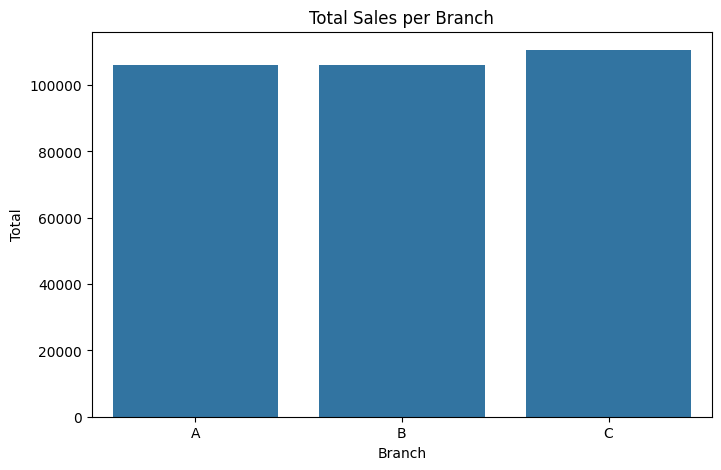

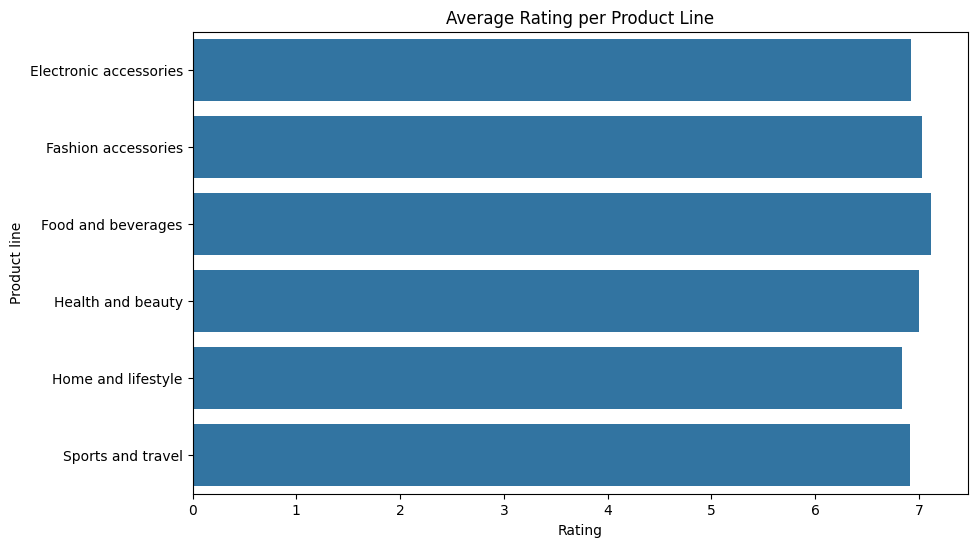

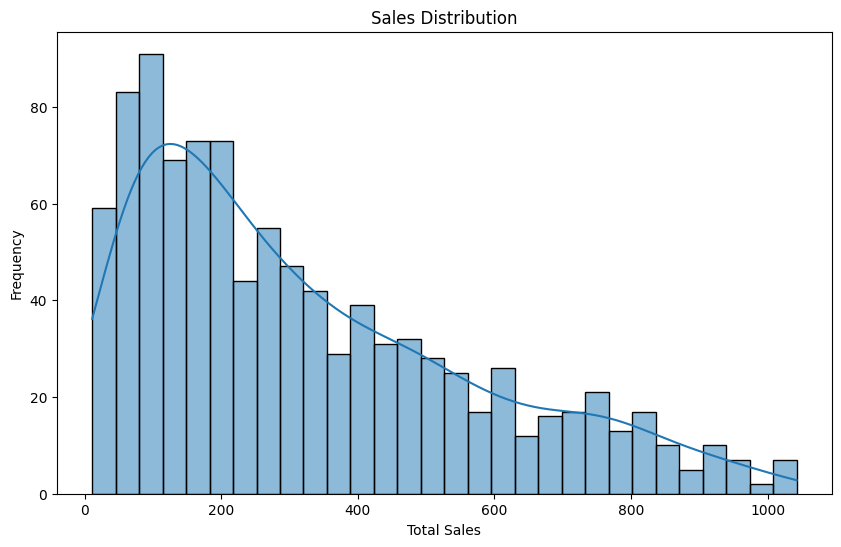

In [14]:
# Data Visualization
visualize_data(total_sales_per_branch, average_rating_per_product_line, df)